In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('~/Documents/Our-Project/df_final.csv')
#Note that this is the full one Marianne made not the one with only 4 genres that maxime had previously created.
cols = [col for col in df.columns.values if 'chroma' not in col]
df = df[cols]

In [13]:
acc = []
f1 = []

In [17]:
for i in range(1,17):
    keep_genres = df.track_genre_top.value_counts()[0:i].index.values
    dfi = df[df.track_genre_top.isin(keep_genres)]
    X,y = dfi.iloc[:,6:],dfi.iloc[:,2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    MLP = MLPClassifier(alpha = .1, random_state=1, hidden_layer_sizes = i)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train2 = scaler.transform(X_train)
    X_test2 = scaler.transform(X_test)
    MLP.fit(X_train2,y_train)
    y_pred = MLP.predict(X_test2)
    acc.append(accuracy_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred,average='weighted'))

16


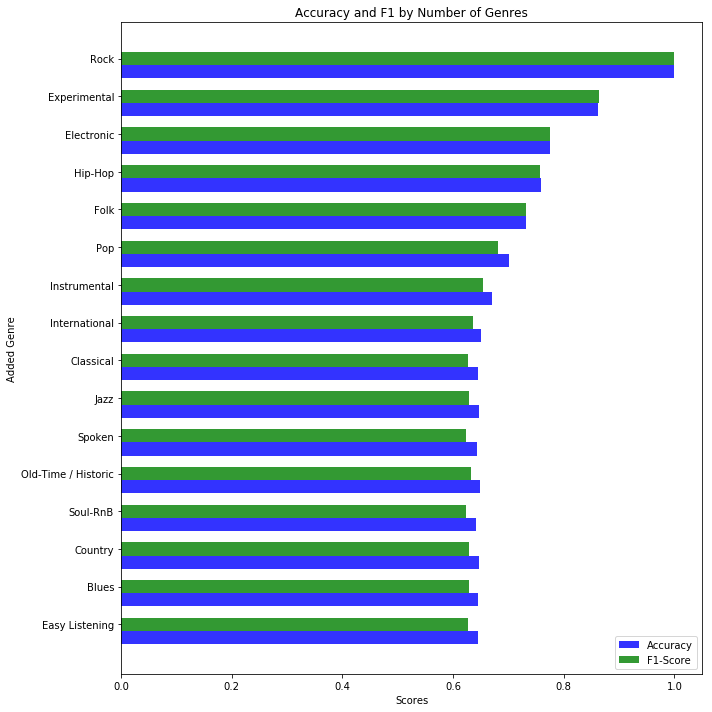

In [57]:
n_groups = 16

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.barh(index, acc[::-1], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Accuracy')
 
rects2 = plt.barh(index + bar_width, f1[::-1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='F1-Score')
 
plt.ylabel('Added Genre')
plt.xlabel('Scores')
plt.title('Accuracy and F1 by Number of Genres')
plt.yticks(index + bar_width, keep_genres[::-1])
plt.legend()

plt.tight_layout()
plt.show()